In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('./kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Задача 1

* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы
  
_1. Изучите стоимости недвижимости_

_2. Изучите распределение квадратуры жилой_

_3. Изучите распределение года постройки_

##### Стоимость недвижимости

In [5]:
df_price = df['price'].value_counts().reset_index()
df_price #подготовили данные по которым построим график распределения

,price,count
0,350000.0,172
1,450000.0,172
2,550000.0,159
3,500000.0,152
4,425000.0,150
...,...,...
4023,607010.0,1
4024,1362500.0,1
4025,298800.0,1
4026,957500.0,1


''

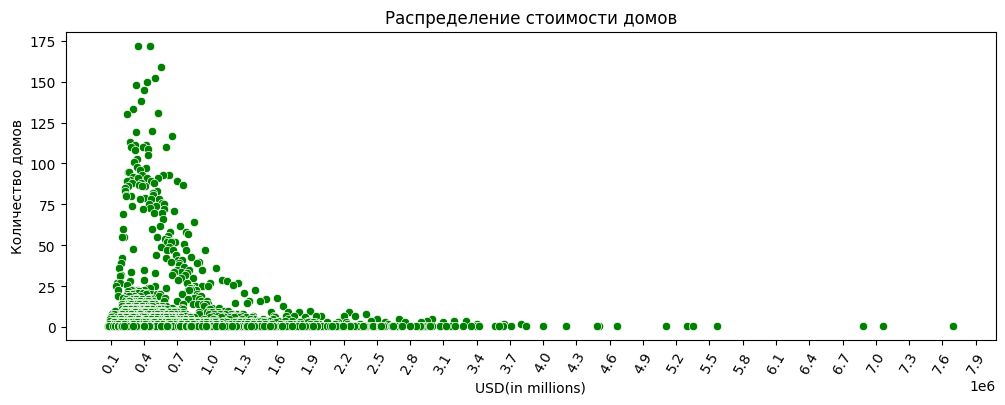

In [6]:
plt.figure(figsize=(12, 4))
## воспользуемся точечным графиком
sns.scatterplot(data = df_price, x = 'price', y = 'count', color = 'green')
plt.xlabel('USD(in millions)')
plt.ylabel('Количество домов')
plt.title('Распределение стоимости домов')
plt.xticks(range(100000,8000000, 300000), rotation = 60)
;

На графике распределения стоимости домов мы видим нормальное распределение. В основном стоимость домов составляет от __100000 USD__ до __1 млн USD__. Именно в этом промежутке находится _основное число_ исследуемых домов.

#### Распределение квадратуры жилой площади в домах

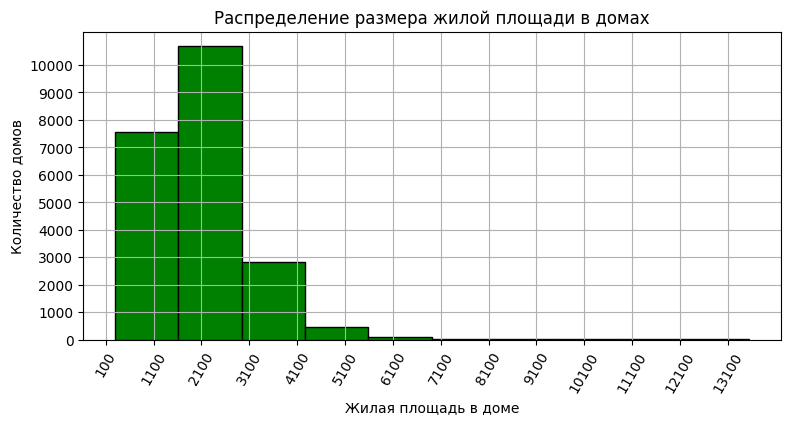

In [7]:
plt.figure(figsize=(9, 4))
plt.hist(df['sqft_living'], color = 'green',edgecolor = 'black')
plt.grid()
plt.xlabel('Жилая площадь в доме')
plt.ylabel('Количество домов')
plt.yticks(range(0,10500, 1000))
plt.xticks(range(100,14000, 1000), rotation = 60)
plt.title('Распределение размера жилой площади в домах');

Данный график также изображает нормальное распределение количества домов по отношению к жилой площади. В основном площадь домов в исследуемой выборке до __4000 м<sup>2</sup>__

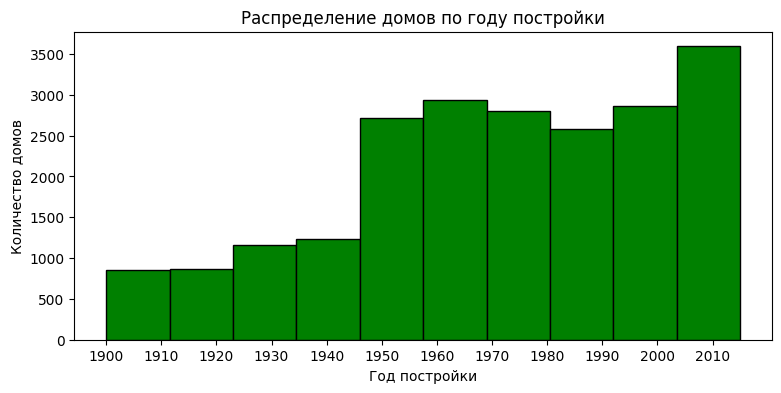

In [8]:
plt.figure(figsize=(9, 4))
plt.hist(df['yr_built'], color = 'green', edgecolor = 'black')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')
plt.xticks(range(1900,2015, 10))
plt.title('Распределение домов по году постройки');

Гистограмма указанная выше показывает нам, что в основном в нашей выборке, дома были построены c __1950 г.__ по __2015 г__. 

### Задача 2
1. Изучите распределение домов от наличия вида на набережную
     + Постройте график
     + Сделайте выводы
2. Изучите распределение этажей домов
3. Изучите распределение состояния домов

In [12]:
#подготовим данные
data = df['waterfront'].value_counts()
data.rename(index = {0:'no waterfront', 1:'waterfront'}, inplace = True)
data

waterfront
no waterfront    21450
waterfront         163
Name: count, dtype: int64

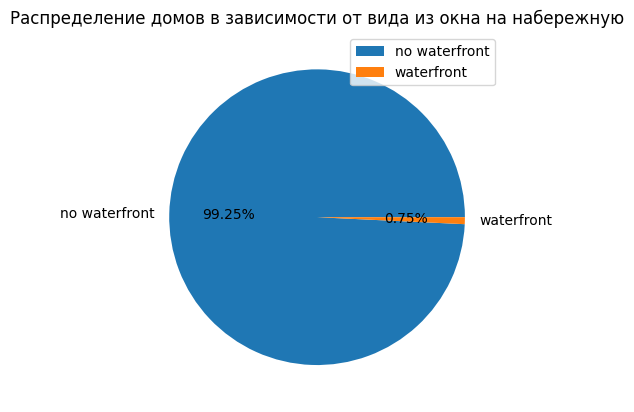

In [28]:
plt.pie(data.values, labels = data.index, autopct = '%1.2f%%')
plt.legend(data.index)
plt.title('Распределение домов в зависимости от вида из окна на набережную');

Согласно получившейся круговой диаграме мы видим, что домов с видом на набережную всего __0,75%__ от всей выборки. В основном дома находятся не у воды.

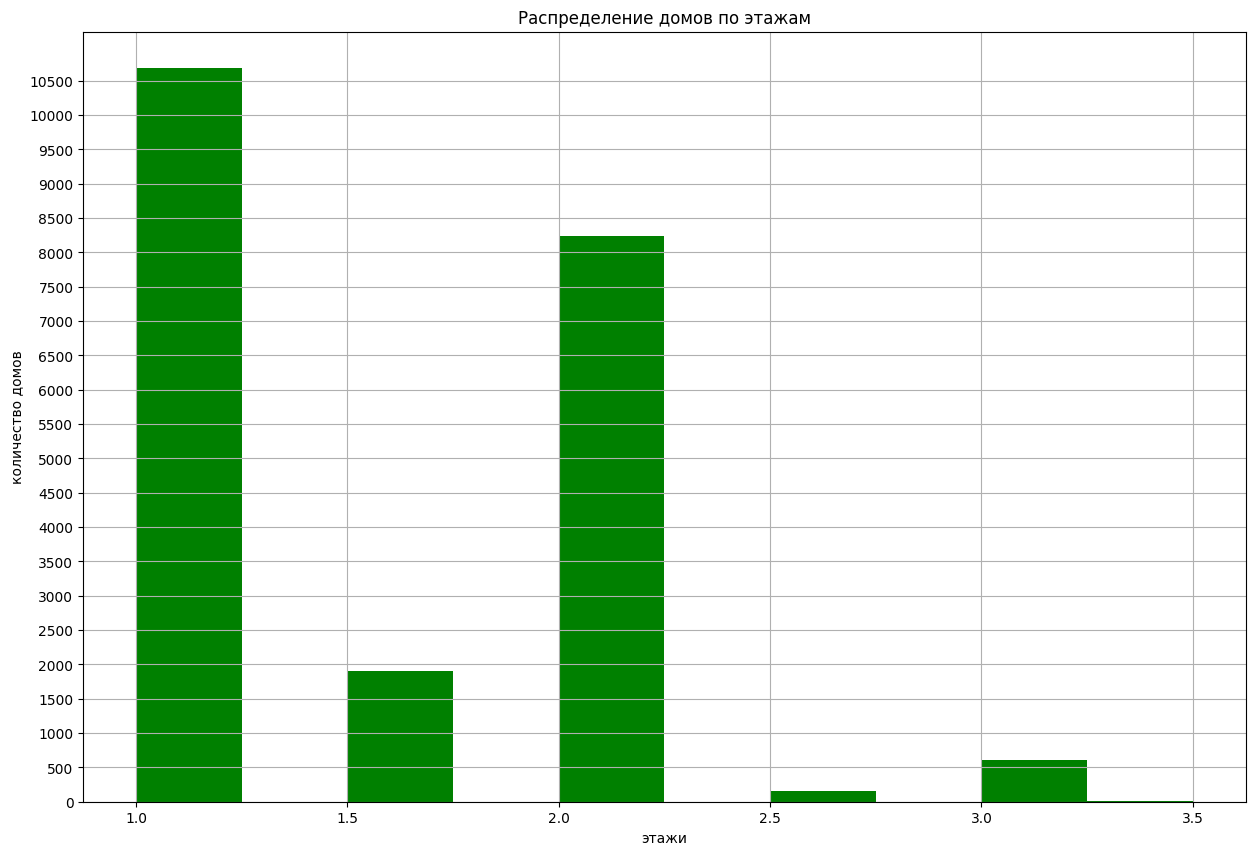

In [42]:
plt.figure(figsize=(15, 10))
plt.hist(df['floors'], color = 'green')
plt.title('Распределение домов по этажам')
plt.xlabel('этажи')
plt.ylabel('количество домов')
plt.yticks(range(0,11000, 500))
plt.grid();

Text(0.5, 1.0, 'Распределение домов по этажам')

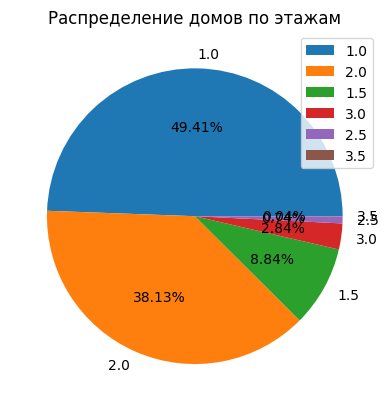

In [32]:
data_floors = df['floors'].value_counts()
plt.pie(data_floors.values, labels = data_floors.index, autopct = '%1.2f%%')
plt.legend(data_floors.index)
plt.title('Распределение домов по этажам')

На самом деле для данной задачи более наглядной будет именно гистограмма, изображающая сколько домов с разным количеством этажей в принципе есть в нашей выборке. 

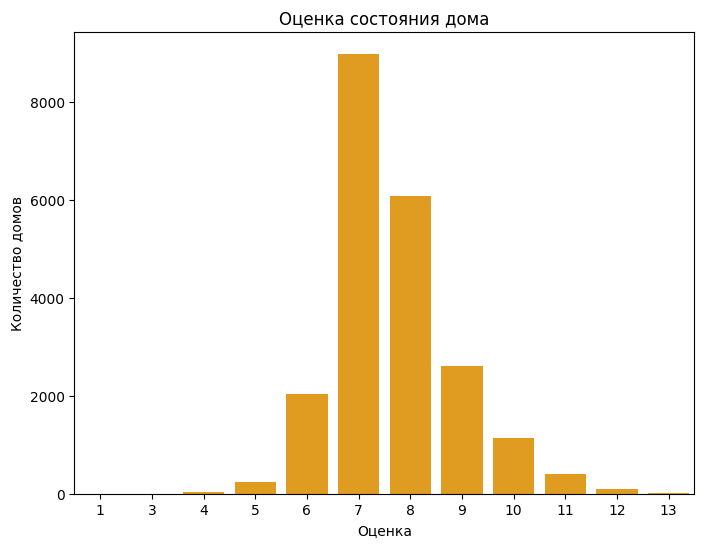

In [52]:
counts = df['grade'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('Оценка состояния дома')
sns.barplot(x=counts.index, y=counts.values, color = 'orange')
plt.ylabel('Количество домов')
plt.xlabel('Оценка')
    
plt.show()

Данный график указывает нам на то, что в основном дома имеют средний уровень конструкции и дизайна. Небольшое количество домов имеют оценку состояния __7 - 8__.

#### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

In [65]:
# для начала построим матрицу корреляций
data_corr = df.corr().round(2)
data_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


#### _Теперь, чтобы визуально представить нашу матрицу построим __тепловую карту__. Благодаря этому инструменту увидим основные показатели, влияющие на цену напрямую._

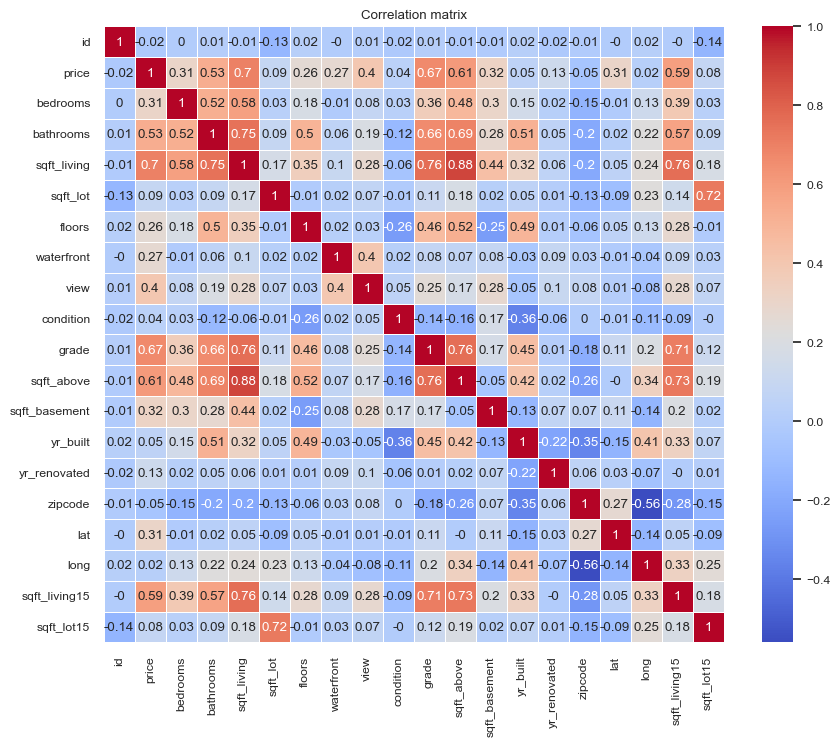

In [69]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=0.8)

sns.heatmap(data_corr, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

_Здесь мы видим, что наибольшее влияние на цену дома оказывает общая жилая площадь. Также немаловажными будут являться оценка состояния дома и количество ванных._

Для дальнейшего анализа посмотрим взаимосвязи

In [40]:
## подготовим данные для более наглядного представления зависимости оценки состояния от цены 
data_grade = df.groupby('grade').agg({'price':['min','mean', 'max']})
data_grade

price                         
             min          mean        max
grade                                    
1       142000.0  1.420000e+05   142000.0
3        75000.0  2.056667e+05   280000.0
4        80000.0  2.143810e+05   435000.0
5        78000.0  2.485240e+05   795000.0
6        82000.0  3.019196e+05  1200000.0
7        90000.0  4.025903e+05  2050000.0
8       140000.0  5.428528e+05  3070000.0
9       230000.0  7.735132e+05  2700000.0
10      316000.0  1.071771e+06  3600000.0
11      420000.0  1.496842e+06  7062500.0
12      835000.0  2.191222e+06  5350000.0
13     1780000.0  3.709615e+06  7700000.0

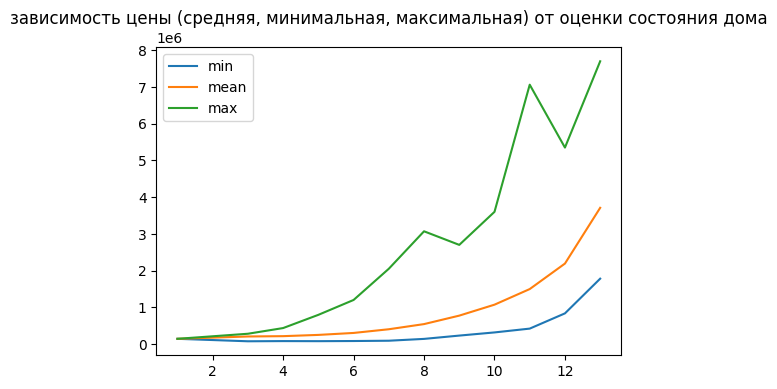

In [41]:
plt.figure(figsize=(6, 4))
plt.plot(data_grade)
plt.legend(['min', 'mean', 'max'])
plt.title('зависимость цены (средняя, минимальная, максимальная) от оценки состояния дома');

С одной стороны мы видим прямую зависимость цены и состояния дома. Однако, при изображении максимальных цен среди всех оценок мы видим резкие выбросы и изменения. Возможно, цены были _искусственно завышены_. Либо такие дома не только имеют высокую оценку состояния, но и также чем-то примечательны(в них жили знаменитые певцы, писатели, ученые, возможно также где-то проходили съемки.

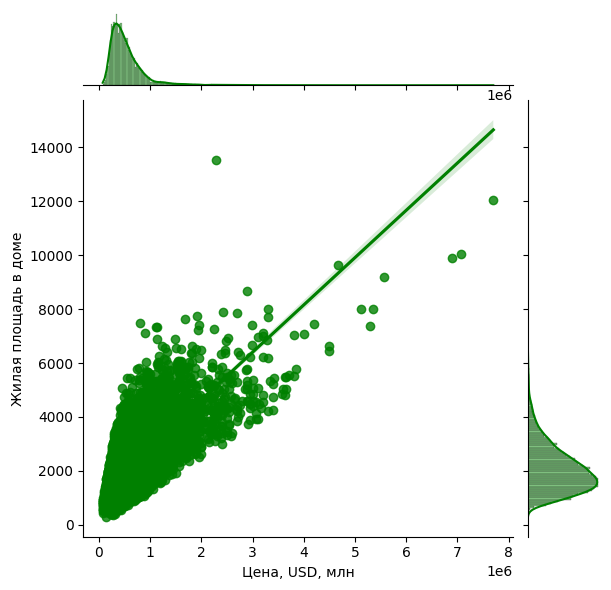

In [20]:
#посмотрим на зависимость цены от размера жилой площади
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg', color = 'green')

plt.ylabel('Жилая площадь в доме')
plt.xlabel('Цена, USD, млн');

Подобный график показывает нам, что подобную зависимость можно считать прямой (что в целом логично). Однако, мы видим, что у нас есть либо выбросы в данных, либо дом, цена которого не так высока, как размер жилой площади. Возможно другие факторы - такие как оценка состояния или год реновации - влияют на его цену при большой площади. 


##### _Либо это тот самый большой дешёвый дом из фильма ужасов_

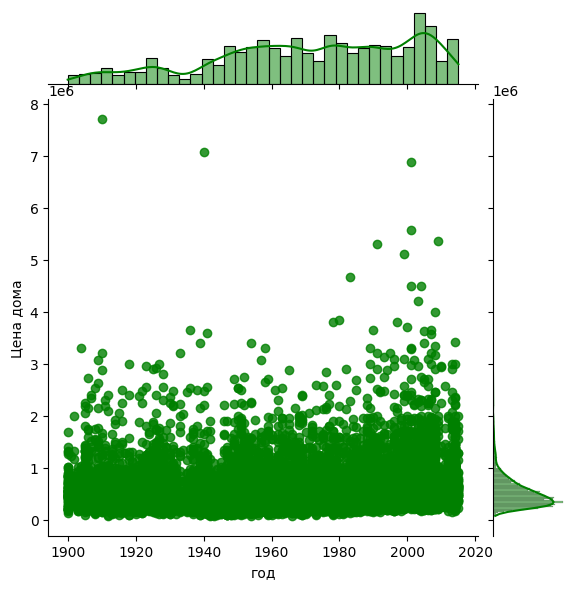

In [47]:
sns.jointplot(y=df['price'], x=df['yr_built'], kind='reg', color = 'green')

plt.ylabel('Цена дома')
plt.xlabel('год');

_Благодаря графику выше мы можем увидеть, что самый дорогой дом в выборке был построен еще в самом начале 20го века._ Однако последние построенные дома становятся все дороже.

In [ ]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg', color = 'green')

plt.ylabel('Жилая площадь в доме')
plt.xlabel('Цена, USD, млн');